In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV

from imblearn.over_sampling import SMOTE 
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_excel("Mobile Dataset.xlsx")

df1.head().T

,0,1,2,3,4
Taken_product,1,0,1,0,0
Yearly_avg_view_on_travel_page,307.0,367.0,277.0,247.0,202.0
preferred_device,Mobile,Mobile,Mobile,Mobile,Mobile
total_likes_on_outstation_checkin_given,38570.0,9765.0,48055.0,48720.0,20685.0
yearly_avg_Outstation_checkins,1,1,1,1,1
member_in_family,2,1,2,4,1
preferred_location_type,Financial,Financial,Other,Financial,Medical
Yearly_avg_comment_on_travel_page,94.0,61.0,92.0,56.0,40.0
total_likes_on_outofstation_checkin_received,5993,5130,2090,2909,3468
week_since_last_outstation_checkin,8,1,6,1,9


In [3]:
df1.shape

(10652, 16)

In [4]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Taken_product,10652.0,0.152084,0.359119,0.0,0.00,0.0,0.00,1.00
Yearly_avg_view_on_travel_page,10652.0,280.205642,66.567644,99.5,232.00,271.0,321.00,455.50
total_likes_on_outstation_checkin_given,10652.0,28170.414852,13937.016880,3570.0,16529.25,28076.0,40149.50,75242.25
yearly_avg_Outstation_checkins,10652.0,8.062336,8.682026,1.0,1.00,3.0,14.00,29.00
member_in_family,10652.0,2.924052,1.044928,1.0,2.00,3.0,4.00,10.00
Yearly_avg_comment_on_travel_page,10652.0,74.353173,21.556143,4.5,57.00,75.0,92.00,144.50
total_likes_on_outofstation_checkin_received,10652.0,6414.445644,4368.643190,1009.0,2945.75,4967.5,8394.25,16572.00
week_since_last_outstation_checkin,10652.0,3.224934,2.628021,0.0,1.00,3.0,5.00,11.00
following_company_page,10652.0,0.277225,0.447650,0.0,0.00,0.0,1.00,1.00
montly_avg_comment_on_company_page,10652.0,22.486481,7.370521,11.0,17.00,22.0,27.00,42.00


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10652 entries, 0 to 10651
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 10652 non-null  int64  
 1   Yearly_avg_view_on_travel_page                10652 non-null  float64
 2   preferred_device                              10652 non-null  object 
 3   total_likes_on_outstation_checkin_given       10652 non-null  float64
 4   yearly_avg_Outstation_checkins                10652 non-null  int64  
 5   member_in_family                              10652 non-null  int64  
 6   preferred_location_type                       10652 non-null  object 
 7   Yearly_avg_comment_on_travel_page             10652 non-null  float64
 8   total_likes_on_outofstation_checkin_received  10652 non-null  int64  
 9   week_since_last_outstation_checkin            10652 non-null 

In [6]:
df1.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [7]:
df1c=df1.copy()
df1c

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1,307.0,Mobile,38570.0,1,2,Financial,94.0,5993,8,1,11,0,1,0,8
1,0,367.0,Mobile,9765.0,1,1,Financial,61.0,5130,1,0,23,1,4,0,10
2,1,277.0,Mobile,48055.0,1,2,Other,92.0,2090,6,1,15,0,2,0,7
3,0,247.0,Mobile,48720.0,1,4,Financial,56.0,2909,1,1,11,0,3,0,8
4,0,202.0,Mobile,20685.0,1,1,Medical,40.0,3468,9,0,12,0,4,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,0,247.0,Mobile,11418.0,5,3,Historical site,99.0,9983,1,0,28,0,2,0,16
10648,0,210.0,Mobile,40886.0,5,3,Other,53.0,3024,2,0,32,0,4,0,14
10649,0,305.0,Mobile,21510.0,6,1,Historical site,55.0,10041,4,0,30,0,1,0,11
10650,0,214.0,Mobile,5478.0,4,3,Beach,103.0,6203,3,1,40,1,2,0,12


In [8]:
df1c['preferred_location_type'].value_counts()

Financial          2409
Beach              1963
Medical            1845
Historical site    1512
Social media        633
Other               587
Entertainment       533
Big Cities          528
Trekking            444
Tour and Travel     107
Hill Stations        84
OTT                   7
Name: preferred_location_type, dtype: int64

In [9]:
print('Feature: Preferred location type')
print(pd.Categorical(df1c['preferred_location_type'].unique()))
print(pd.Categorical(df1c['preferred_location_type'].unique()).codes)
df1c['preferred_location_type'] = pd.Categorical(df1c['preferred_location_type']).codes

Feature: Preferred location type
['Financial', 'Other', 'Medical', 'Beach', 'Entertainment', ..., 'OTT', 'Historical site', 'Big Cities', 'Trekking', 'Hill Stations']
Length: 12
Categories (12, object): ['Beach', 'Big Cities', 'Entertainment', 'Financial', ..., 'Other', 'Social media', 'Tour and Travel', 'Trekking']
[ 3  8  6  0  2  9 10  7  5  1 11  4]


In [10]:
df1c['preferred_location_type'].value_counts()

3     2409
0     1963
6     1845
5     1512
9      633
8      587
2      533
1      528
11     444
10     107
4       84
7        7
Name: preferred_location_type, dtype: int64

In [11]:
df_mobile = df1c.copy()

df_mobile.head()

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1,307.0,Mobile,38570.0,1,2,3,94.0,5993,8,1,11,0,1,0,8
1,0,367.0,Mobile,9765.0,1,1,3,61.0,5130,1,0,23,1,4,0,10
2,1,277.0,Mobile,48055.0,1,2,8,92.0,2090,6,1,15,0,2,0,7
3,0,247.0,Mobile,48720.0,1,4,3,56.0,2909,1,1,11,0,3,0,8
4,0,202.0,Mobile,20685.0,1,1,6,40.0,3468,9,0,12,0,4,0,6


In [12]:
df_mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10652 entries, 0 to 10651
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 10652 non-null  int64  
 1   Yearly_avg_view_on_travel_page                10652 non-null  float64
 2   preferred_device                              10652 non-null  object 
 3   total_likes_on_outstation_checkin_given       10652 non-null  float64
 4   yearly_avg_Outstation_checkins                10652 non-null  int64  
 5   member_in_family                              10652 non-null  int64  
 6   preferred_location_type                       10652 non-null  int8   
 7   Yearly_avg_comment_on_travel_page             10652 non-null  float64
 8   total_likes_on_outofstation_checkin_received  10652 non-null  int64  
 9   week_since_last_outstation_checkin            10652 non-null 

In [13]:
df_mobile.shape

(10652, 16)

In [14]:
from scipy.stats import zscore

In [15]:
df_mobile

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1,307.0,Mobile,38570.0,1,2,3,94.0,5993,8,1,11,0,1,0,8
1,0,367.0,Mobile,9765.0,1,1,3,61.0,5130,1,0,23,1,4,0,10
2,1,277.0,Mobile,48055.0,1,2,8,92.0,2090,6,1,15,0,2,0,7
3,0,247.0,Mobile,48720.0,1,4,3,56.0,2909,1,1,11,0,3,0,8
4,0,202.0,Mobile,20685.0,1,1,6,40.0,3468,9,0,12,0,4,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,0,247.0,Mobile,11418.0,5,3,5,99.0,9983,1,0,28,0,2,0,16
10648,0,210.0,Mobile,40886.0,5,3,8,53.0,3024,2,0,32,0,4,0,14
10649,0,305.0,Mobile,21510.0,6,1,5,55.0,10041,4,0,30,0,1,0,11
10650,0,214.0,Mobile,5478.0,4,3,0,103.0,6203,3,1,40,1,2,0,12


In [16]:
df_mobile['preferred_device']=df_mobile['preferred_device'].replace({'Mobile':1})

In [17]:
df_mobile['preferred_device'].value_counts()

1    10652
Name: preferred_device, dtype: int64

In [18]:
X= df_mobile.drop(["Taken_product"],axis=1)


In [19]:
y=df_mobile.Taken_product

In [213]:
X.head()

,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,307.0,1,38570.0,1,2,3,94.0,5993,8,1,11,0,1,0,8
1,367.0,1,9765.0,1,1,3,61.0,5130,1,0,23,1,4,0,10
2,277.0,1,48055.0,1,2,8,92.0,2090,6,1,15,0,2,0,7
3,247.0,1,48720.0,1,4,3,56.0,2909,1,1,11,0,3,0,8
4,202.0,1,20685.0,1,1,6,40.0,3468,9,0,12,0,4,0,6


In [214]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Taken_product, dtype: int64

In [215]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10652 entries, 0 to 10651
Data columns (total 15 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Yearly_avg_view_on_travel_page                10652 non-null  float64
 1   preferred_device                              10652 non-null  int64  
 2   total_likes_on_outstation_checkin_given       10652 non-null  float64
 3   yearly_avg_Outstation_checkins                10652 non-null  int64  
 4   member_in_family                              10652 non-null  int64  
 5   preferred_location_type                       10652 non-null  int8   
 6   Yearly_avg_comment_on_travel_page             10652 non-null  float64
 7   total_likes_on_outofstation_checkin_received  10652 non-null  int64  
 8   week_since_last_outstation_checkin            10652 non-null  int64  
 9   following_company_page                        10652 non-null 

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [23]:
X_train.head()

,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
3531,249.0,1,4161.0,16,3,9,82.0,5366,5,0,20,0,3,0,9
6990,426.0,1,50509.0,11,5,1,96.0,5384,4,0,20,0,3,0,6
6230,267.0,1,45611.0,2,4,0,66.0,2778,3,0,20,0,3,0,14
6062,239.0,1,34270.0,1,4,5,96.0,4348,0,0,15,0,4,0,6
9198,367.0,1,41208.0,26,4,0,111.0,16572,5,0,28,0,3,0,33


In [24]:
y_train.head()

3531    1
6990    0
6230    0
6062    0
9198    0
Name: Taken_product, dtype: int64

In [25]:
X_test.head()

,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
9636,351.0,1,36861.0,6,3,5,82.0,8937,8,0,27,0,4,0,25
4907,271.0,1,46072.0,1,4,8,45.0,16572,6,1,22,0,1,0,33
7220,260.0,1,22023.0,27,2,5,106.0,2323,2,0,24,0,4,0,9
2512,330.0,1,34335.0,1,3,3,90.0,3162,3,0,14,0,4,0,7
4485,234.0,1,26154.0,1,4,3,69.0,4474,1,0,42,1,4,0,15


In [26]:
y_test.head()

9636    0
4907    0
7220    0
2512    0
4485    0
Name: Taken_product, dtype: int64

In [27]:
X_train.shape

(7456, 15)

In [28]:
y_train.shape

(7456,)

In [29]:
X_test.shape

(3196, 15)

In [30]:
y_test.shape

(3196,)

###  CART

In [31]:
from sklearn.tree import DecisionTreeClassifier #from scikit Learn

In [32]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [33]:
# Fit the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [34]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [35]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                                   Imp
total_likes_on_outstation_checkin_given       0.235794
total_likes_on_outofstation_checkin_received  0.234811
Yearly_avg_view_on_travel_page                0.096317
yearly_avg_Outstation_checkins                0.071916
travelling_network_rating                     0.058867
following_company_page                        0.051728
week_since_last_outstation_checkin            0.051026
member_in_family                              0.044496
Yearly_avg_comment_on_travel_page             0.042069
Daily_Avg_mins_spend_on_traveling_page        0.041717
working_flag                                  0.030209
preferred_location_type                       0.017958
montly_avg_comment_on_company_page            0.014042
Adult_flag                                    0.009049
preferred_device                              0.000000


In [36]:
y_predict = dt_model.predict(X_test)

In [37]:
y_predict.shape

(3196,)

In [38]:
ytrain_predict = dt_model.predict(X_train)
ytest_predict = dt_model.predict(X_test)

In [39]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (7456,)
ytest_predict (3196,)


In [40]:
ytest_predict

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
ytest_predict_prob=dt_model.predict_proba(X_test)
ytest_predict_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [42]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


AUC: 1.000


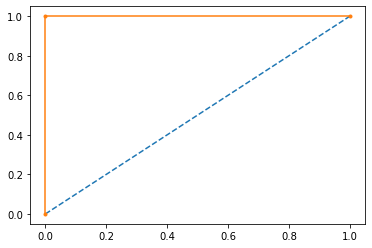

In [43]:
# predict probabilities
probs = dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.935


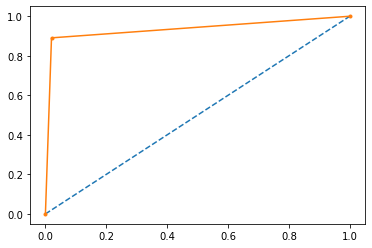

In [44]:
# predict probabilities
probs = dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [46]:
confusion_matrix(y_train, ytrain_predict)

array([[6330,    0],
       [   0, 1126]])

In [47]:
#Train Data Accuracy
dt_model.score(X_train,y_train) 

1.0

In [48]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456



In [49]:
confusion_matrix(y_test, ytest_predict)

array([[2648,   54],
       [  54,  440]])

In [50]:
#Test Data Accuracy
dt_model.score(X_test,y_test)

0.9662077596996246

In [51]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2702
           1       0.89      0.89      0.89       494

    accuracy                           0.97      3196
   macro avg       0.94      0.94      0.94      3196
weighted avg       0.97      0.97      0.97      3196



#### Tuning

In [52]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 9,min_samples_leaf=10,min_samples_split=80)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=80)

In [53]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

In [54]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                                   Imp
total_likes_on_outofstation_checkin_received  0.305415
total_likes_on_outstation_checkin_given       0.196247
following_company_page                        0.127319
Yearly_avg_view_on_travel_page                0.100291
yearly_avg_Outstation_checkins                0.062840
week_since_last_outstation_checkin            0.045425
Daily_Avg_mins_spend_on_traveling_page        0.037549
travelling_network_rating                     0.036355
member_in_family                              0.032949
working_flag                                  0.024962
Yearly_avg_comment_on_travel_page             0.018201
Adult_flag                                    0.011442
preferred_location_type                       0.000790
montly_avg_comment_on_company_page            0.000216
preferred_device                              0.000000


In [55]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [56]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (7456,)
ytest_predict (3196,)


In [57]:
ytest_predict

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.91504178, 0.08495822],
       [0.91578947, 0.08421053],
       [0.9218492 , 0.0781508 ],
       ...,
       [0.9218492 , 0.0781508 ],
       [0.5       , 0.5       ],
       [0.91504178, 0.08495822]])

In [59]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.915042,0.084958
1,0.915789,0.084211
2,0.921849,0.078151
3,0.921849,0.078151
4,0.921849,0.078151


AUC: 0.886


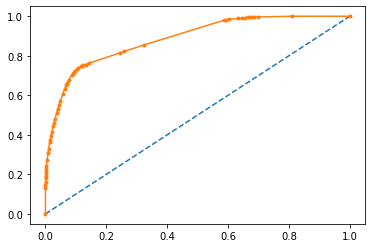

In [60]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.854


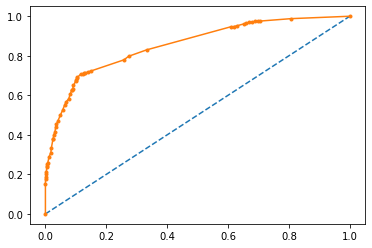

In [61]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
confusion_matrix(y_train, ytrain_predict)

array([[6131,  199],
       [ 585,  541]])

In [64]:
#Train Data Accuracy
reg_dt_model.score(X_train,y_train)

0.8948497854077253

In [65]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6330
           1       0.73      0.48      0.58      1126

    accuracy                           0.89      7456
   macro avg       0.82      0.72      0.76      7456
weighted avg       0.89      0.89      0.89      7456



In [66]:
confusion_matrix(y_test, ytest_predict)

array([[2592,  110],
       [ 262,  232]])

In [67]:
#Test Data Accuracy
reg_dt_model.score(X_test,y_test)

0.8836045056320401

In [68]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2702
           1       0.68      0.47      0.56       494

    accuracy                           0.88      3196
   macro avg       0.79      0.71      0.74      3196
weighted avg       0.87      0.88      0.87      3196



#### SMOTE

In [69]:
sm = SMOTE()


X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [70]:
## Let's check the shape after SMOTE
X_train_res.shape

(12660, 15)

In [71]:
smote_cart_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 9,min_samples_leaf=10,min_samples_split=80)
smote_cart_model.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=80)

In [72]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [73]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (7456,)
ytest_predict (3196,)


In [74]:
ytest_predict

array([0, 0, 0, ..., 0, 0, 0])

In [75]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.91504178, 0.08495822],
       [0.91578947, 0.08421053],
       [0.9218492 , 0.0781508 ],
       ...,
       [0.9218492 , 0.0781508 ],
       [0.5       , 0.5       ],
       [0.91504178, 0.08495822]])

In [76]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.915042,0.084958
1,0.915789,0.084211
2,0.921849,0.078151
3,0.921849,0.078151
4,0.921849,0.078151


AUC: 0.886


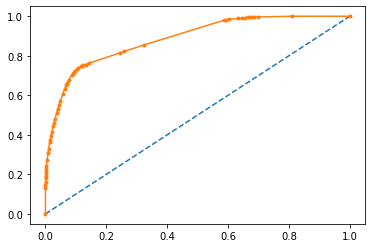

In [77]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.854


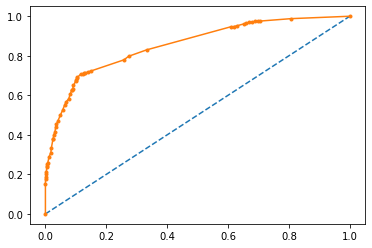

In [78]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [79]:
from sklearn.metrics import classification_report,confusion_matrix

In [80]:
confusion_matrix(y_train, ytrain_predict)

array([[6131,  199],
       [ 585,  541]])

In [81]:
#Train Data Accuracy
reg_dt_model.score(X_train,y_train)

0.8948497854077253

In [82]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      6330
           1       0.73      0.48      0.58      1126

    accuracy                           0.89      7456
   macro avg       0.82      0.72      0.76      7456
weighted avg       0.89      0.89      0.89      7456



In [83]:
confusion_matrix(y_test, ytest_predict)

array([[2592,  110],
       [ 262,  232]])

In [84]:
#Test Data Accuracy
reg_dt_model.score(X_test,y_test)

0.8836045056320401

In [85]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2702
           1       0.68      0.47      0.56       494

    accuracy                           0.88      3196
   macro avg       0.79      0.71      0.74      3196
weighted avg       0.87      0.88      0.87      3196



 ###  Logistic Regression


In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [88]:
log_train_predict = log_model.predict(X_train)
log_test_predict = log_model.predict(X_test)

In [89]:
log_model.score(X_train,y_train)

0.8489806866952789

In [90]:
log_model.score(X_test,y_test)

0.8454317897371715

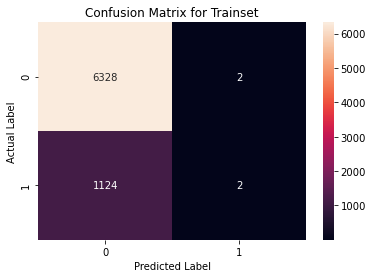

In [107]:
#Confusion Matrix for Train set
confusion_matrix(y_train,log_train_predict)
sns.heatmap(confusion_matrix(y_train,log_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [108]:
print(classification_report(y_train,log_train_predict)) 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6330
           1       0.50      0.00      0.00      1126

    accuracy                           0.85      7456
   macro avg       0.67      0.50      0.46      7456
weighted avg       0.80      0.85      0.78      7456



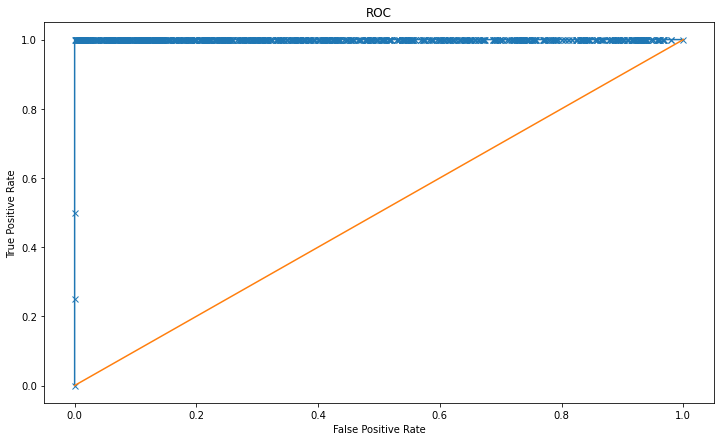

Area under Curve is 1.0


In [109]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_train_predict,log_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_train_predict,log_model.predict_proba(X_train)[:,1]))

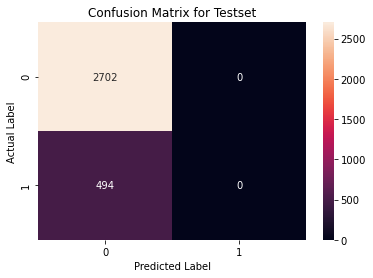

In [110]:
#Confusion Matrix for Train set
confusion_matrix(y_test,log_test_predict)
sns.heatmap(confusion_matrix(y_test,log_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [111]:
print(classification_report(y_test,log_test_predict)) 

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2702
           1       0.00      0.00      0.00       494

    accuracy                           0.85      3196
   macro avg       0.42      0.50      0.46      3196
weighted avg       0.71      0.85      0.77      3196



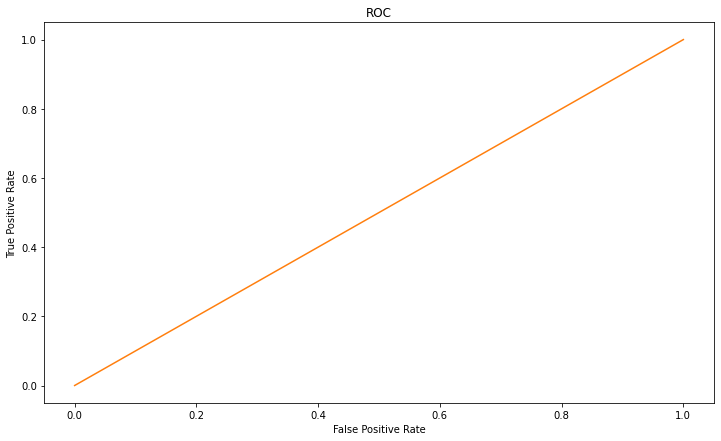

ValueError: Only one class present in y_true. ROC AUC score is not defined in that case.

In [115]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_test_predict,log_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_test_predict,log_model.predict_proba(X_test)[:,1]))



In [164]:
grid_log={'penalty':['none', 'l1', 'l2', 'elasticnet'],
      'solver':['sag','lbfgs','newtoncg','lbfgs', 'liblinear', 'saga'],
      'tol':[0.0001,0.00001]}

In [165]:
grid_search1 = GridSearchCV(estimator = log_model, param_grid = grid_log, cv = 3,n_jobs=-1,scoring='f1')

In [166]:
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['sag', 'lbfgs', 'newtoncg', 'lbfgs',
                                    'liblinear', 'saga'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [167]:
print(grid_search1.best_params_,'\n')
print(grid_search1.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-05} 

LogisticRegression(penalty='l1', solver='liblinear', tol=1e-05)


In [168]:
best_model1 = grid_search1.best_estimator_

In [169]:
# Prediction on the training set

log_train_predict = best_model1.predict(X_train)
log_test_predict = best_model1.predict(X_test)

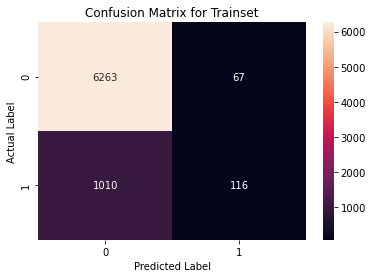

In [170]:
#Confusion Matrix for Train set
confusion_matrix(y_train,log_train_predict)
sns.heatmap(confusion_matrix(y_train,log_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [171]:
print(classification_report(y_train,log_train_predict)) 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      6330
           1       0.63      0.10      0.18      1126

    accuracy                           0.86      7456
   macro avg       0.75      0.55      0.55      7456
weighted avg       0.83      0.86      0.81      7456



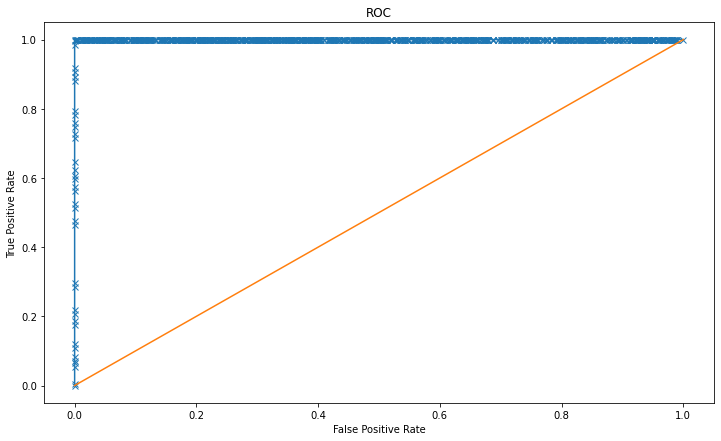

Area under Curve is 1.0


In [172]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_train_predict,best_model1.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_train_predict,best_model1.predict_proba(X_train)[:,1]))

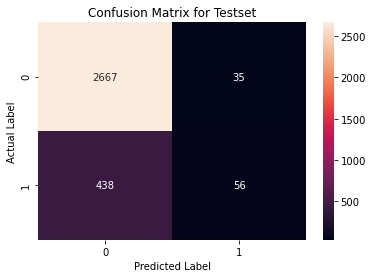

In [173]:
#Confusion Matrix for Test set
confusion_matrix(y_test,log_test_predict)
sns.heatmap(confusion_matrix(y_test,log_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [174]:
print(classification_report(y_test,log_test_predict)) 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2702
           1       0.62      0.11      0.19       494

    accuracy                           0.85      3196
   macro avg       0.74      0.55      0.55      3196
weighted avg       0.82      0.85      0.81      3196



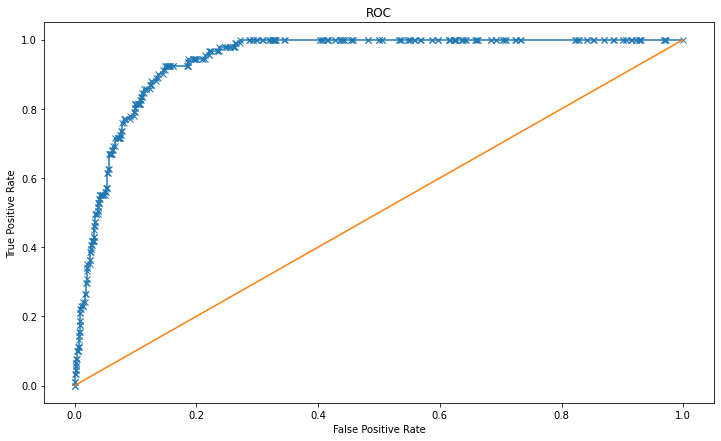

Area under Curve is 0.9409601670471236


In [175]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_test_predict,log_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_test_predict,log_model.predict_proba(X_test)[:,1]))

Feature: 0, Score: -0.00439
Feature: 1, Score: 0.00654
Feature: 2, Score: -0.00001
Feature: 3, Score: 0.02807
Feature: 4, Score: 0.01180
Feature: 5, Score: 0.02600
Feature: 6, Score: -0.00079
Feature: 7, Score: -0.00009
Feature: 8, Score: 0.15529
Feature: 9, Score: 1.43629
Feature: 10, Score: -0.01208
Feature: 11, Score: 0.09480
Feature: 12, Score: -0.16040
Feature: 13, Score: -0.71908
Feature: 14, Score: -0.03008


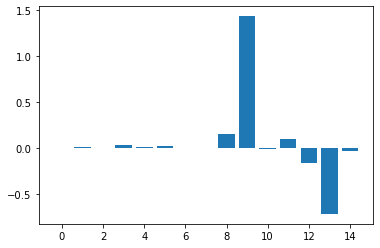

In [176]:
# get importance
importance = best_model1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Linear Discriminant Analysis

In [91]:
LDA = LinearDiscriminantAnalysis()
lda_model=LDA.fit(X_train, y_train)
lda_model

LinearDiscriminantAnalysis()

In [92]:
lda_train_predict = lda_model.predict(X_train)
lda_test_predict = lda_model.predict(X_test)

In [93]:
lda_model.score(X_train,y_train)

0.8560890557939914

In [94]:
lda_model.score(X_test,y_test)

0.8538798498122653

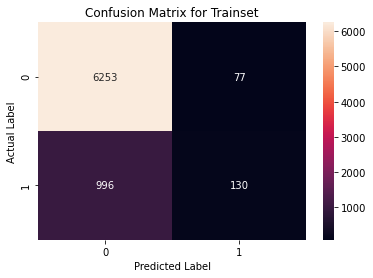

In [116]:
#Confusion Matrix for Train set
confusion_matrix(y_train,lda_train_predict)
sns.heatmap(confusion_matrix(y_train,lda_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [117]:
print(classification_report(y_train,lda_train_predict)) 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      6330
           1       0.63      0.12      0.20      1126

    accuracy                           0.86      7456
   macro avg       0.75      0.55      0.56      7456
weighted avg       0.83      0.86      0.81      7456



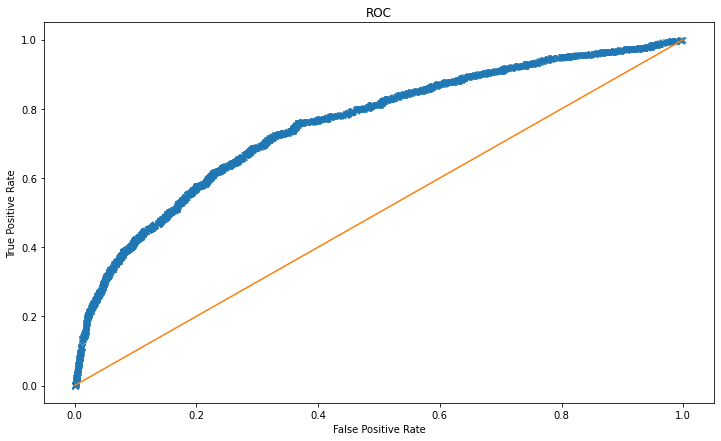

Area under Curve is 0.7535299498567536


In [118]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_train,lda_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_train,lda_model.predict_proba(X_train)[:,1]))

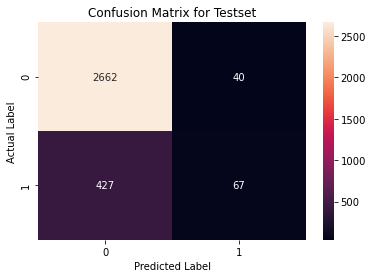

In [119]:
#Confusion Matrix for Train set
confusion_matrix(y_test,lda_test_predict)
sns.heatmap(confusion_matrix(y_test,lda_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [120]:
print(classification_report(y_test,lda_test_predict)) 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2702
           1       0.63      0.14      0.22       494

    accuracy                           0.85      3196
   macro avg       0.74      0.56      0.57      3196
weighted avg       0.83      0.85      0.81      3196



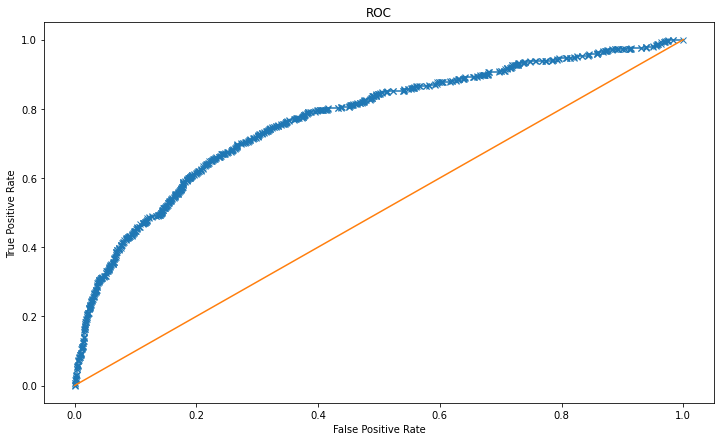

Area under Curve is 0.7697364675139422


In [121]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_test,lda_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_test,lda_model.predict_proba(X_test)[:,1]))

In [177]:
grid_lda={ 'solver':['svd', 'lsqr', 'eigen'],
          'shrinkage':['auto', 'float','none'],
          'tol':[0.001,0.0001,0.00001]}

In [178]:
grid_search2 = GridSearchCV(estimator = lda_model, param_grid = grid_lda, cv = 3,n_jobs=-1,scoring='f1')

In [179]:
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', 'float', 'none'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='f1')

In [180]:
lda_model.score(X_test,y_test)

0.8538798498122653

In [181]:
print(grid_search2.best_params_,'\n')
print(grid_search2.best_estimator_)

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.001} 

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)


In [182]:
best_model2 = grid_search2.best_estimator_

In [183]:
lda_train_predict = best_model2.predict(X_train)
lda_test_predict = best_model2.predict(X_test)

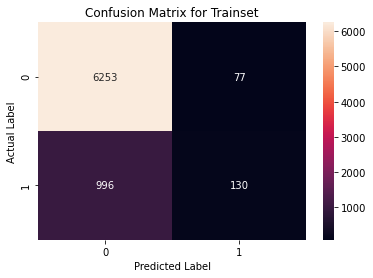

In [184]:
#Confusion Matrix for Train set
confusion_matrix(y_train,lda_train_predict)
sns.heatmap(confusion_matrix(y_train,lda_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [185]:
print(classification_report(y_train,lda_train_predict)) 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      6330
           1       0.63      0.12      0.20      1126

    accuracy                           0.86      7456
   macro avg       0.75      0.55      0.56      7456
weighted avg       0.83      0.86      0.81      7456



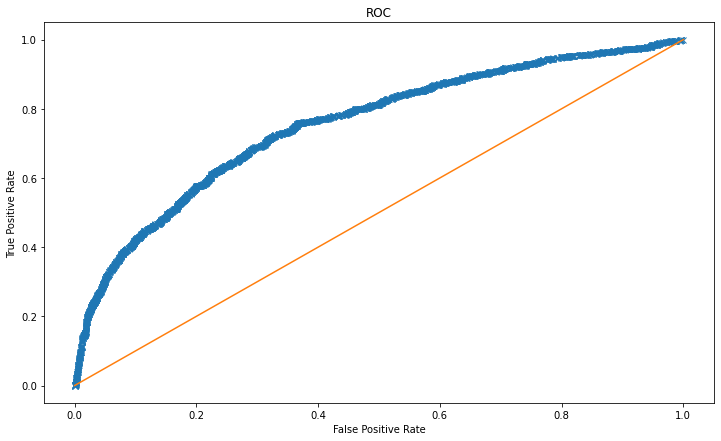

Area under Curve is 0.7535347200592628


In [186]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_train,best_model2.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_train,best_model2.predict_proba(X_train)[:,1]))

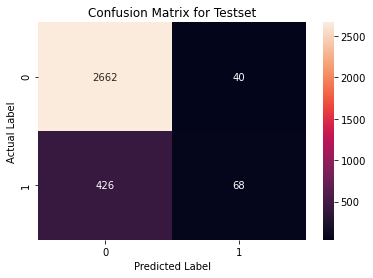

In [187]:
#Confusion Matrix for Test set
confusion_matrix(y_test,lda_test_predict)
sns.heatmap(confusion_matrix(y_test,lda_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [188]:
print(classification_report(y_test,lda_test_predict)) 

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2702
           1       0.63      0.14      0.23       494

    accuracy                           0.85      3196
   macro avg       0.75      0.56      0.57      3196
weighted avg       0.83      0.85      0.81      3196



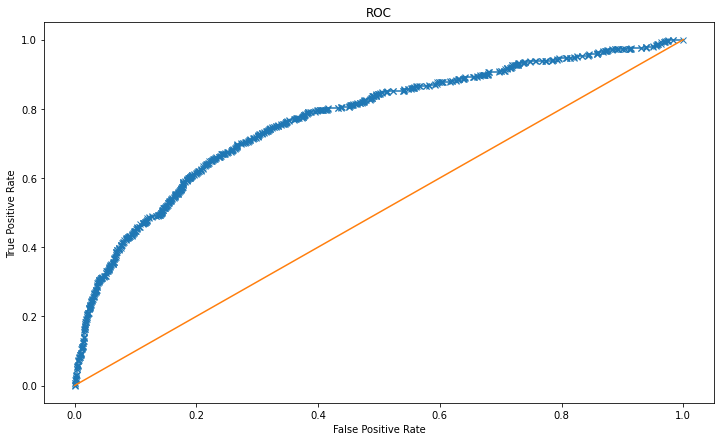

Area under Curve is 0.7697364675139422


In [189]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_test,lda_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_test,lda_model.predict_proba(X_test)[:,1]))

Feature: 0, Score: -0.00473
Feature: 1, Score: -0.00000
Feature: 2, Score: -0.00001
Feature: 3, Score: 0.02671
Feature: 4, Score: 0.00598
Feature: 5, Score: 0.02396
Feature: 6, Score: -0.00102
Feature: 7, Score: -0.00006
Feature: 8, Score: 0.15541
Feature: 9, Score: 1.65607
Feature: 10, Score: -0.01253
Feature: 11, Score: 0.11041
Feature: 12, Score: -0.14521
Feature: 13, Score: -0.65973
Feature: 14, Score: -0.02427


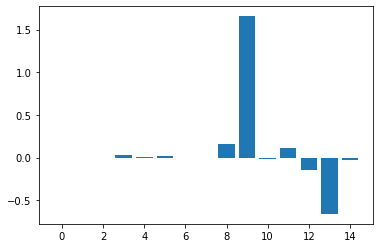

In [190]:
# get importance
importance = best_model2.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

 ### Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model=RF_model.fit(X_train, y_train)

In [96]:
RF_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, y_train)
print(model_score)

1.0


In [97]:
RF_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)


0.9715269086357947


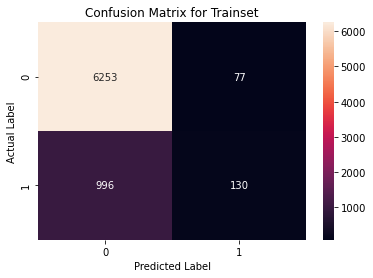

In [122]:
#Confusion Matrix for Train set
confusion_matrix(y_train,RF_train_predict)
sns.heatmap(confusion_matrix(y_train,RF_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [123]:
print(classification_report(y_train,RF_train_predict)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456



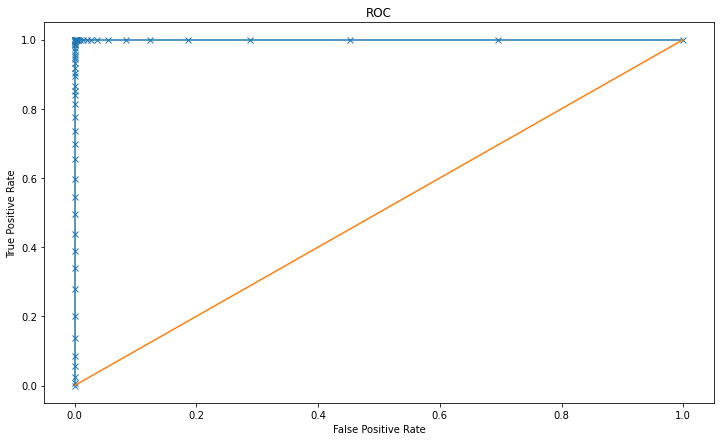

Area under Curve is 1.0


In [124]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_train,RF_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_train,RF_model.predict_proba(X_train)[:,1]))

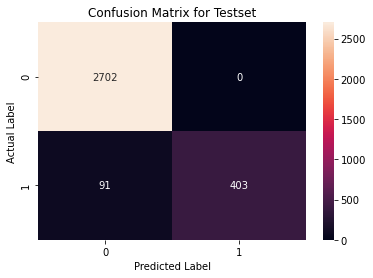

In [125]:
#Confusion Matrix for Test set
confusion_matrix(y_test,RF_test_predict)
sns.heatmap(confusion_matrix(y_test,RF_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [126]:
print(classification_report(y_test,RF_test_predict)) 

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2702
           1       1.00      0.82      0.90       494

    accuracy                           0.97      3196
   macro avg       0.98      0.91      0.94      3196
weighted avg       0.97      0.97      0.97      3196



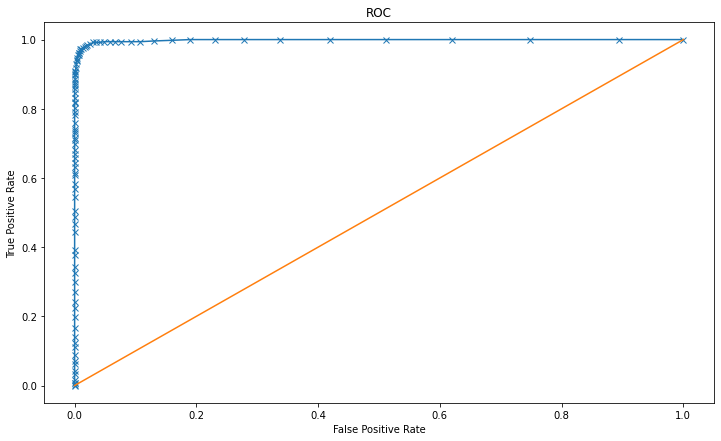

Area under Curve is 0.9983184595606194


In [127]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_test,RF_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_test,RF_model.predict_proba(X_test)[:,1]))

In [140]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model=RF_model.fit(X_train, y_train)
RF_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, y_train)
print(model_score)

1.0


In [141]:
RF_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)

0.9715269086357947


### RF using grid search

In [142]:
from sklearn.model_selection import RandomizedSearchCV

In [143]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200,300 ]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300]}

In [144]:
param_grid={
    'max_depth':[7,8,9,10],
    'max_features':[3,4,5],
    'min_samples_leaf':[50,100],
    'min_samples_split':[150,300],
    'n_estimators':[100,200,300]
}
rfcl =RandomForestClassifier()
grid_search= GridSearchCV(estimator=rfcl,param_grid=param_grid,cv=3)

In [145]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [146]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [147]:
best_grid = rf_random.best_estimator_

In [148]:
best_grid

RandomForestClassifier(bootstrap=False, max_depth=40, n_estimators=1400)

In [149]:
RF_train_predict = best_grid.predict(X_train)
RF_test_predict = best_grid.predict(X_test)

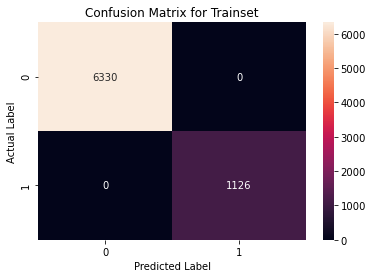

In [150]:
#Confusion Matrix for Test set
confusion_matrix(y_train,RF_train_predict)
sns.heatmap(confusion_matrix(y_train,RF_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [151]:
print(classification_report(y_train,RF_train_predict)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      1126

    accuracy                           1.00      7456
   macro avg       1.00      1.00      1.00      7456
weighted avg       1.00      1.00      1.00      7456



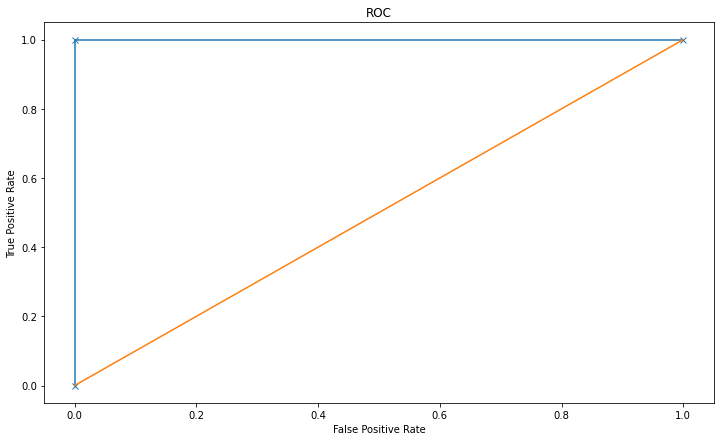

Area under Curve is 1.0


In [152]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1]))

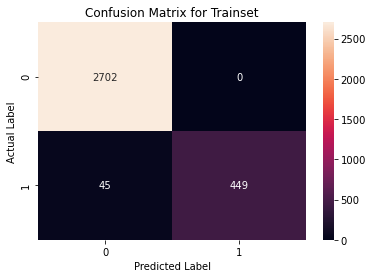

In [153]:
#Confusion Matrix for Test set
confusion_matrix(y_test,RF_test_predict)
sns.heatmap(confusion_matrix(y_test,RF_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [154]:
print(classification_report(y_test,RF_test_predict)) 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2702
           1       1.00      0.91      0.95       494

    accuracy                           0.99      3196
   macro avg       0.99      0.95      0.97      3196
weighted avg       0.99      0.99      0.99      3196



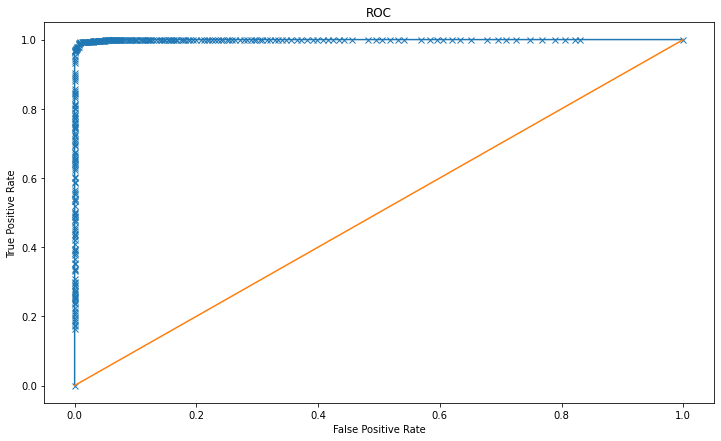

Area under Curve is 0.9995579822413746


In [155]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1]))

Feature: 0, Score: 0.12542
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.14582
Feature: 3, Score: 0.07828
Feature: 4, Score: 0.05032
Feature: 5, Score: 0.04583
Feature: 6, Score: 0.07225
Feature: 7, Score: 0.17267
Feature: 8, Score: 0.06267
Feature: 9, Score: 0.06196
Feature: 10, Score: 0.03735
Feature: 11, Score: 0.01409
Feature: 12, Score: 0.04693
Feature: 13, Score: 0.01374
Feature: 14, Score: 0.07268


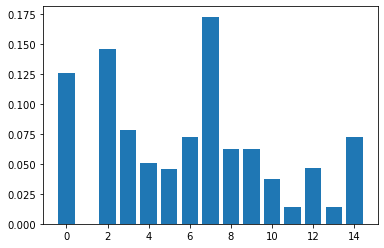

In [156]:
# get importance
importance = best_grid.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

###  KNN

In [98]:
from sklearn.neighbors import KNeighborsClassifier


In [99]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    # evaluate test accuracy
    scores = KNN.score(X_test, y_test)
    ac_scores.append(scores)

# accuracy scores for 1,3,5,7....
MCE = [1-x for x in ac_scores]
acc = [x for x in ac_scores]
acc

[0.9931163954943679,
 0.9780976220275344,
 0.9652690863579474,
 0.9389862327909887,
 0.9102002503128911,
 0.8811013767209012,
 0.8670212765957447,
 0.8692115143929913,
 0.8676470588235294,
 0.8601376720901126]

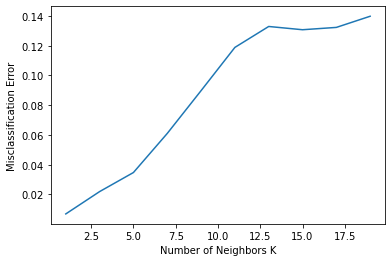

In [100]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

#####  KNN model with k=3 is optimum from scree plot

In [101]:
#model score k=3
KNN_model=KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train,y_train)
KNN_train_predict = KNN_model.predict(X_train)

KNN_test_predict = KNN_model.predict(X_test)


In [102]:
KNN_model.score(X_train,y_train)

0.994098712446352

In [103]:
KNN_model.score(X_test,y_test)

0.9780976220275344

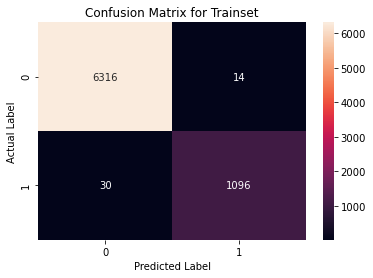

In [128]:
#Confusion Matrix for Train set
confusion_matrix(y_train,KNN_train_predict)
sns.heatmap(confusion_matrix(y_train,KNN_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [129]:
print(classification_report(y_train,KNN_train_predict)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       0.99      0.97      0.98      1126

    accuracy                           0.99      7456
   macro avg       0.99      0.99      0.99      7456
weighted avg       0.99      0.99      0.99      7456



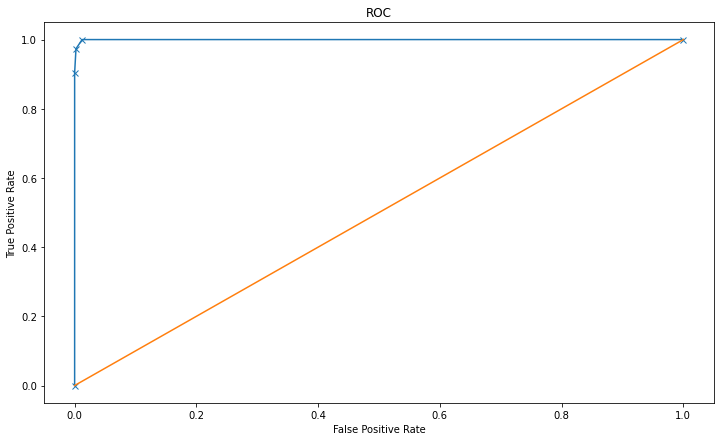

Area under Curve is 0.9997297820578653


In [130]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_train,KNN_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_train,KNN_model.predict_proba(X_train)[:,1]))

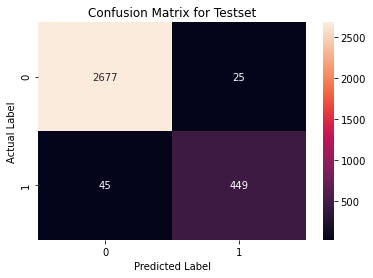

In [131]:
#Confusion Matrix for Train set
confusion_matrix(y_test,KNN_test_predict)
sns.heatmap(confusion_matrix(y_test,KNN_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [132]:
print(classification_report(y_test,KNN_test_predict)) 

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2702
           1       0.95      0.91      0.93       494

    accuracy                           0.98      3196
   macro avg       0.97      0.95      0.96      3196
weighted avg       0.98      0.98      0.98      3196



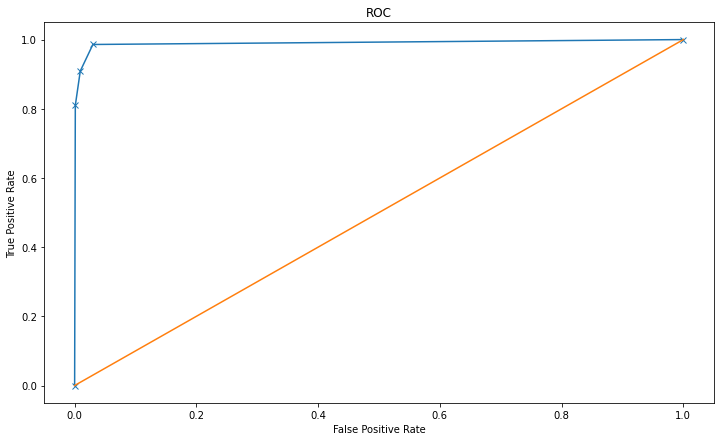

Area under Curve is 0.9902302837604173


In [133]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_test,KNN_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_test,KNN_model.predict_proba(X_test)[:,1]))

### SMOTE

In [191]:
from imblearn.over_sampling import SMOTE 
from sklearn import metrics


In [192]:
sm = SMOTE()


X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [193]:
X_train_res.shape

(12660, 15)

### LOGIT

In [194]:
smote_log_model = LogisticRegression()
smote_log_model.fit(X_train_res, y_train_res)

LogisticRegression()

In [195]:
smote_log_train_predict = smote_log_model.predict(X_train_res)
smote_log_test_predict = smote_log_model.predict(X_test)

In [196]:
smote_log_train_predict = smote_log_model.predict(X_train_res)
model_score = smote_log_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, smote_log_train_predict))
print(metrics.classification_report(y_train_res ,smote_log_train_predict))

0.6282780410742496
[[3687 2643]
 [2063 4267]]
              precision    recall  f1-score   support

           0       0.64      0.58      0.61      6330
           1       0.62      0.67      0.64      6330

    accuracy                           0.63     12660
   macro avg       0.63      0.63      0.63     12660
weighted avg       0.63      0.63      0.63     12660



In [197]:
smote_log_test_predict = smote_log_model.predict(X_test)
model_score = smote_log_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, smote_log_test_predict))
print(metrics.classification_report(y_test ,smote_log_test_predict))

0.5991864831038799
[[1574 1128]
 [ 153  341]]
              precision    recall  f1-score   support

           0       0.91      0.58      0.71      2702
           1       0.23      0.69      0.35       494

    accuracy                           0.60      3196
   macro avg       0.57      0.64      0.53      3196
weighted avg       0.81      0.60      0.65      3196



###  LDA

In [198]:
smote_lda_model = LinearDiscriminantAnalysis()
smote_lda_model.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

In [199]:
smote_lda_train_predict = smote_lda_model.predict(X_train_res)
smote_lda_test_predict = smote_lda_model.predict(X_test)

In [200]:
smote_lda_train_predict = smote_lda_model.predict(X_train_res)
model_score = smote_log_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, smote_lda_train_predict))
print(metrics.classification_report(y_train_res ,smote_lda_train_predict))

0.6282780410742496
[[4227 2103]
 [1906 4424]]
              precision    recall  f1-score   support

           0       0.69      0.67      0.68      6330
           1       0.68      0.70      0.69      6330

    accuracy                           0.68     12660
   macro avg       0.68      0.68      0.68     12660
weighted avg       0.68      0.68      0.68     12660



In [201]:
smote_log_test_predict = smote_lda_model.predict(X_test)
model_score = smote_lda_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, smote_lda_test_predict))
print(metrics.classification_report(y_test ,smote_lda_test_predict))

0.6789737171464331
[[1791  911]
 [ 115  379]]
              precision    recall  f1-score   support

           0       0.94      0.66      0.78      2702
           1       0.29      0.77      0.42       494

    accuracy                           0.68      3196
   macro avg       0.62      0.72      0.60      3196
weighted avg       0.84      0.68      0.72      3196



###  KNN

In [202]:
Smote_KNN = KNeighborsClassifier(n_neighbors=3)
Smote_KNN.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [203]:
Smote_KNN_train_predict = Smote_KNN.predict(X_train_res)
Smote_KNN_test_predict = Smote_KNN.predict(X_test)

In [204]:
Smote_KNN_train_predict = Smote_KNN.predict(X_train_res)
model_score = Smote_KNN.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, Smote_KNN_train_predict))
print(metrics.classification_report(y_train_res ,Smote_KNN_train_predict))

0.9936018957345971
[[6296   34]
 [  47 6283]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6330
           1       0.99      0.99      0.99      6330

    accuracy                           0.99     12660
   macro avg       0.99      0.99      0.99     12660
weighted avg       0.99      0.99      0.99     12660



In [205]:
smote_log_test_predict = Smote_KNN.predict(X_test)
model_score = Smote_KNN.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, smote_log_test_predict))
print(metrics.classification_report(y_test ,smote_log_test_predict))

0.9815394242803505
[[2655   47]
 [  12  482]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2702
           1       0.91      0.98      0.94       494

    accuracy                           0.98      3196
   macro avg       0.95      0.98      0.97      3196
weighted avg       0.98      0.98      0.98      3196



###  RF


In [206]:
Smote_RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
Smote_RF_model=Smote_RF_model.fit(X_train_res, y_train_res)

In [207]:
Smote_RF_train_predict = Smote_RF_model.predict(X_train_res)
Smote_RF_test_predict = Smote_RF_model.predict(X_test)

In [208]:
Smote_RF_train_predict = Smote_RF_model.predict(X_train_res)
model_score = Smote_RF_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, Smote_RF_train_predict))
print(metrics.classification_report(y_train_res ,Smote_RF_train_predict))

1.0
[[6330    0]
 [   0 6330]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6330
           1       1.00      1.00      1.00      6330

    accuracy                           1.00     12660
   macro avg       1.00      1.00      1.00     12660
weighted avg       1.00      1.00      1.00     12660



In [209]:
Smote_RF_test_predict = Smote_RF_model.predict(X_test)
model_score = Smote_RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, Smote_RF_test_predict))
print(metrics.classification_report(y_test ,Smote_RF_test_predict))

0.9865456821026283
[[2697    5]
 [  38  456]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2702
           1       0.99      0.92      0.95       494

    accuracy                           0.99      3196
   macro avg       0.99      0.96      0.97      3196
weighted avg       0.99      0.99      0.99      3196

